# Predicting Student Exam Pass/Fail

Problem Statement

We want to predict wether a student passes(1) or fails(0) based on the number of hours they studied.

In [2]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Create Dummy set

# Hours studied
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#Pass (1) or Fail(0)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

m = len(X)

In [14]:
#Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
#Prediction function

def predict(X, w, b):
    z = w * X + b
    return sigmoid(z)



In [16]:
#Cost function

def compute_cost(X, y, w, b):
    m = len(y)
    predictions = predict(X, w, b)
    cost = -(1/m) * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))
    return cost

In [17]:
# Gradient descent

def gradient_descent(X, y, w, b, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = predict(X, w, b)
        error = predictions - y

        dw = (1/m) * np.dot(error, X)
        db = (1/m) * np.sum(error)

        w -= alpha * dw
        b -= alpha * db

        cost_history.append(compute_cost(X, y, w, b))
    return w, b, cost_history

In [18]:
# Model training

w, b = 0, 0
alpha = 0.1
epochs = 1000

w, b, cost_history = gradient_descent(X, y, w, b, alpha, epochs)

print(f"Learned parameters: w = {w:.2f}, b = {b:.2f}")
print(f"Final cost: {cost_history[-1]: .4f}")

Learned parameters: w = 1.27, b = -5.45
Final cost:  0.1403


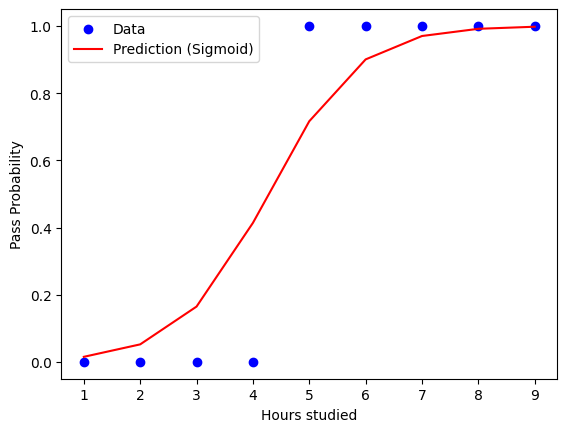

In [19]:
# Visualize desicion boundary

plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, predict(X, w, b), color ="red", label="Prediction (Sigmoid)")
plt.xlabel("Hours studied")
plt.ylabel("Pass Probability")
plt.legend()
plt.show()

In [20]:
# Make predictions

hours = 4.5
prob = predict(hours, w, b)
print(f"Probability of passing with {hours} hours studied: {prob:.2f}")

if prob >= 0.5:
    print("PredictionsL: PASS!")
else:
    print("Prediction: FAIL :(")

Probability of passing with 4.5 hours studied: 0.57
PredictionsL: PASS!
